# Case Study - Credit Card Fraud Detection
* Our e-commerce store sells books, thousands of books sold in last many years.
* Credit card frauds in online transactions can cause immense loss.
* We will use our transaction history to build a Fraud detection system.
* We use a publicly available real dataset with credit card transactions being anonymized for privacy reasons.

# Problems in Credit Card Fraud Detection
* Anyone can steal the 15/16 digit number, security code and expiration date.
* We have used rules based system till now - For example,
    * Is the first purchase more than $ 500?
    * Is the IP from a different country than the credit card issuing country, does it match with location of the user?
* Task is to separate genuine customers from frauds.
* Another problem - A vast majority of users will NOT be fraudulent. Thus, making it hard to infer patterns. A highly imbalanced dataset --> thus, we would need to use different sampling techniques and metrics to evaluate the model.

##  Context


* It is said that only 0.1% of credit card transactions are fraudulent. Since, the daily transaction volume is huge, this means a large amount of money.
* Estimated cost of Fraud in the US alone is over 9 billion dollars, increasing every year.

## Goal
* Build a classifier which can tell apart fraudulent from genuine transactions with corresponding confidence.
* We will use both ML and a Deep Neural Network.

# Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
np.random.seed(2)

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.shape

(284807, 31)

### We have around 280K transaction with their labels.

#### Classes - 0 Non Fraudulent and 1 for Fraudulent

# Data Preparation

In [6]:
# Normalize Amount from -1 to +1
from sklearn.preprocessing import StandardScaler

In [7]:
data['normalized_Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [8]:
data=data.drop(columns=['Amount'])

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
#Drop time column
data=data.drop(columns=['Time'])

In [11]:
#Split the dataset
X=data.iloc[:,data.columns!='Class']
y=data.loc[:,'Class']

In [12]:
X.shape,y.shape

((284807, 29), (284807,))

# Deep Learning 

## Split the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [16]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [17]:
# Define model
model=keras.models.Sequential([
    keras.layers.Dense(16,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

# Train the model

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=5,batch_size=15)

Epoch 1/5
13291/13291 [==============================] - 11s 826us/step - loss: 0.0084 - accuracy: 0.9987
Epoch 2/5
13291/13291 [==============================] - 10s 782us/step - loss: 0.0040 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 10s 776us/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 10s 785us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 11s 791us/step - loss: 0.0035 - accuracy: 0.9994


In [21]:
model.evaluate(X_test,y_test)

2671/2671 [==============================] - 1s 549us/step - loss: 0.0035 - accuracy: 0.9994


[0.0034730012994259596, 0.9994031190872192]

In [22]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

# # Metrics to use
* Accuracy - Total correct predictions 
* Precision - out of all positives predicted, how many were correct
* Specificity - out of all negatives present, how many were correctly identified
* Recall - out of all positives present, how many were correctly identified

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [24]:
cm=confusion_matrix(y_test,y_pred.round())

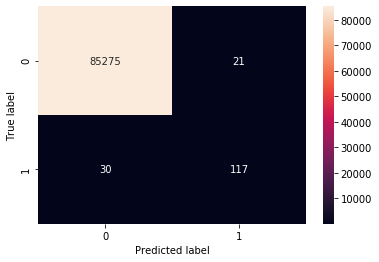

In [25]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [26]:
precision_score(y_test,y_pred.round())

0.8478260869565217

In [27]:
recall_score(y_test,y_pred.round())

0.7959183673469388

In [28]:
f1_score(y_test,y_pred.round())

0.8210526315789473

In [29]:
y_pred=model.predict(X)

In [30]:
y_expected=pd.DataFrame(y)

In [31]:
cm=confusion_matrix(y,y_pred.round())

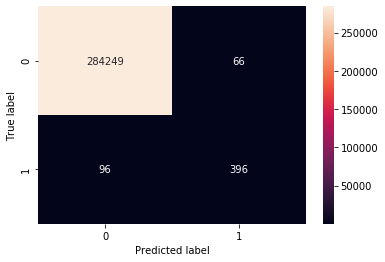

In [32]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [33]:
precision_score(y,y_pred.round())

0.8571428571428571

In [34]:
recall_score(y,y_pred.round())

0.8048780487804879

In [35]:
f1_score(y,y_pred.round())

0.8301886792452831

# Machine Learning Classifier

## Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc=RandomForestClassifier(n_estimators=100)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=rfc.predict(X_test)

In [40]:
rfc.score(X_test,y_test)

0.9995435553526912

In [41]:
cm=confusion_matrix(y_test,y_pred)

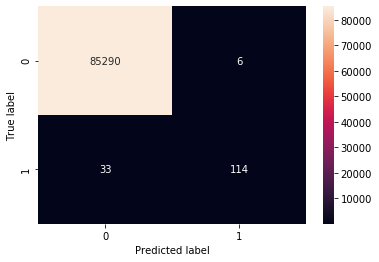

In [42]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [43]:
precision_score(y_test,y_pred)

0.95

In [44]:
recall_score(y_test,y_pred)

0.7755102040816326

In [45]:
f1_score(y_test,y_pred)

0.8539325842696629

In [46]:
y_pred_all=rfc.predict(X)

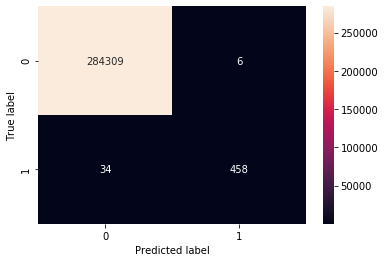

In [47]:
cm=confusion_matrix(y,y_pred_all)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [48]:
precision_score(y,y_pred_all)

0.9870689655172413

In [49]:
recall_score(y,y_pred_all)

0.9308943089430894

In [50]:
f1_score(y,y_pred_all)

0.9581589958158995

# Decision Tree

In [51]:
from sklearn.tree import  DecisionTreeClassifier

In [52]:
dtc=DecisionTreeClassifier()

In [53]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=dtc.predict(X_test)

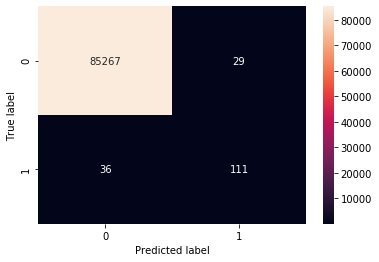

In [55]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [56]:
precision_score(y_test,y_pred)

0.7928571428571428

In [57]:
recall_score(y_test,y_pred)

0.7551020408163265

In [58]:
f1_score(y_test,y_pred)

0.7735191637630662

In [59]:
#For whole dataset
y_pred_all=dtc.predict(X)

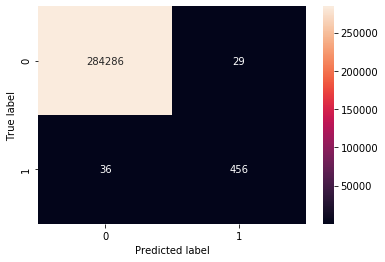

In [60]:
cm=confusion_matrix(y,y_pred_all)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [61]:
precision_score(y,y_pred_all)

0.9402061855670103

In [62]:
recall_score(y,y_pred_all)

0.926829268292683

In [63]:
f1_score(y,y_pred_all)

0.9334698055271238

# Sampling

* We have an unbalanced dataset, so we have to use sampling techniques

* Undersampling or Oversampling

* for example, if data has 3 X and 6 Y, to get balanced dataset - if we undersample we will get 3 X, 3 Y(out of 6) but losing information, or if we oversample, we will get 6 Y and we will create duplicates of 3 X to have 6 X

* Undersampled data should be representative of the actual dataset

* For oversampling, you need to create new info - one technique is SMOTE sampling

## SMOTE - Synthetic Minority over sampling technique

* Create a new vector between two exisiting data points

# Let's start with undersampling

In [64]:
fraud_indices=np.array(data[data.Class==1].index)

In [65]:
number_frauds=len(fraud_indices)

In [66]:
print(number_frauds)

492


In [67]:
non_fraud_indices=np.array(data[data.Class==0].index)

In [68]:
number_non_frauds=len(non_fraud_indices)

In [69]:
print(number_non_frauds)

284315


In [70]:
random_non_index=np.random.choice(non_fraud_indices,number_frauds,replace=False)

In [71]:
random_non_index=np.array(random_non_index)

In [72]:
print(len(random_non_index))

492


In [73]:
undersample_index=np.concatenate((fraud_indices,random_non_index))

In [74]:
len(undersample_index)

984

In [75]:
under_sample_data=data.iloc[undersample_index,:]

In [76]:
X_under=under_sample_data.iloc[:,under_sample_data.columns!='Class']

In [77]:
y_under=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [78]:
X_under.shape

(984, 29)

In [79]:
y_under.shape

(984, 1)

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X_under,y_under,test_size=0.3)

In [81]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [83]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=15)

Epoch 1/5
46/46 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.9026
Epoch 2/5
46/46 [==============================] - 0s 900us/step - loss: 0.2444 - accuracy: 0.9128
Epoch 3/5
46/46 [==============================] - 0s 864us/step - loss: 0.2023 - accuracy: 0.9186
Epoch 4/5
46/46 [==============================] - 0s 862us/step - loss: 0.1823 - accuracy: 0.9244
Epoch 5/5
46/46 [==============================] - 0s 817us/step - loss: 0.1680 - accuracy: 0.9317


In [84]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 812us/step - loss: 0.1635 - accuracy: 0.9392


[0.16349570453166962, 0.9391891956329346]

In [85]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

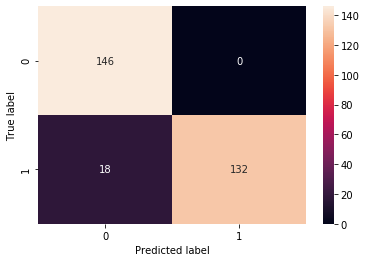

In [86]:
cm=confusion_matrix(y_test,y_pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [87]:
precision_score(y_test,y_pred.round())

1.0

In [88]:
recall_score(y_test,y_pred.round())

0.88

In [89]:
f1_score(y_test,y_pred.round())

0.9361702127659575

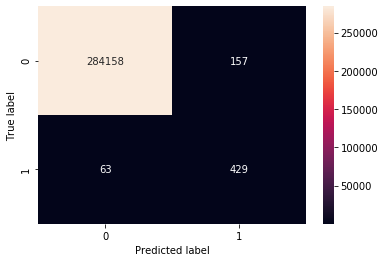

In [90]:
y_pred=model.predict(X)
cm=confusion_matrix(y,y_pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [91]:
precision_score(y,y_pred.round())

0.7320819112627986

In [92]:
recall_score(y,y_pred.round())

0.8719512195121951

In [93]:
f1_score(y,y_pred.round())

0.7959183673469389

# Smote

* Losing data didnt work best, thus, we try oversampling

In [94]:
#!pip install delayed

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

In [97]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [99]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [100]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=15)

Epoch 1/5
26537/26537 [==============================] - 24s 886us/step - loss: 0.0296 - accuracy: 0.9899
Epoch 2/5
26537/26537 [==============================] - 23s 865us/step - loss: 0.0127 - accuracy: 0.9965
Epoch 3/5
26537/26537 [==============================] - 22s 821us/step - loss: 0.0104 - accuracy: 0.9973
Epoch 4/5
26537/26537 [==============================] - 26s 972us/step - loss: 0.0090 - accuracy: 0.9977
Epoch 5/5
26537/26537 [==============================] - 23s 848us/step - loss: 0.0082 - accuracy: 0.9980


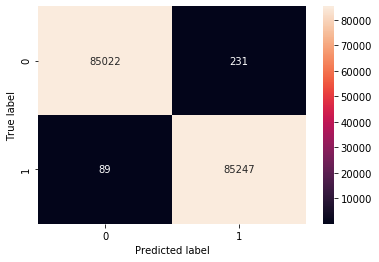

In [101]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)
cm=confusion_matrix(y_test,y_pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

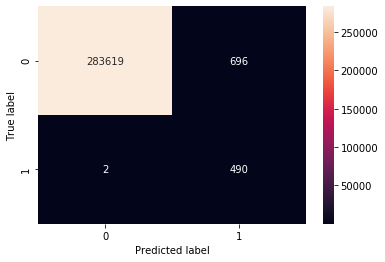

In [102]:
y_pred=model.predict(X)
cm=confusion_matrix(y,y_pred.round())
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [103]:
precision_score(y,y_pred.round())

0.4131534569983137

In [104]:
recall_score(y,y_pred.round())

0.9959349593495935

In [105]:
f1_score(y,y_pred.round())

0.5840286054827176

# Conclusion

* Oversampling & Neural Networks gave us good recall (most Frauds caught, which is what we care more about)